In [1]:
path = 'https://raw.githubusercontent.com/LunusMax/football-data/refs/heads/main/Laterais_Brasileirao/df_laterais_esq_092025.csv'

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [3]:
data = pd.read_csv(path, sep=';')

In [4]:
data.head()

,Jogador,Minutos,TklW,Int,Blocks,PassBlocks,Cmp,Cmp%,PrgC,PrgP,PPA,Crosses,SCA,CrsPA,GCA,PPG
0,Alex Sandro,959,5,14,11,7,688,88.7,24,89,9,17,24,3,2,2.24
1,Ayrton Lucas,527,14,3,3,3,387,91.7,16,44,4,8,15,3,1,2.24
2,Piquerez,1691,21,16,22,16,868,79.4,24,109,21,93,59,14,5,2.19
3,Kaiki Bruno,1776,48,28,23,19,534,74.0,39,57,13,53,33,8,4,2.00
4,Reinaldo,1721,19,11,15,14,724,70.4,31,87,13,98,57,8,8,1.81


In [5]:
data.rename(columns={'Minutos': 'Minutes'}, inplace=True)

In [6]:
# Métricas por 90 minutos
data['TklW/90'] = (data['TklW'] * 90) / (data['Minutes'])
data['Int/90'] = (data['Int'] * 90) / (data['Minutes'])
data['Cmp/90'] = (data['Cmp'] * 90) / (data['Minutes'])
data['Blocks/90'] = (data['Blocks'] * 90) / (data['Minutes'])
data['PassBlocks/90'] = (data['PassBlocks'] * 90) / (data['Minutes'])
data['PrgC/90'] = (data['PrgC'] * 90) / (data['Minutes'])
data['PrgP/90'] = (data['PrgP'] * 90) / (data['Minutes'])
data['PPA/90'] = (data['PPA'] * 90) / (data['Minutes'])
data['Crosses/90'] = (data['Crosses'] * 90) / (data['Minutes'])
data['SCA/90'] = (data['SCA'] * 90) / (data['Minutes'])
data['CrsPA/90'] = (data['CrsPA'] * 90) / (data['Minutes'])
data['GCA/90'] = (data['GCA'] * 90) / (data['Minutes'])

In [7]:
data.head()

,Jogador,Minutes,TklW,Int,Blocks,PassBlocks,Cmp,Cmp%,PrgC,PrgP,...,Cmp/90,Blocks/90,PassBlocks/90,PrgC/90,PrgP/90,PPA/90,Crosses/90,SCA/90,CrsPA/90,GCA/90
0,Alex Sandro,959,5,14,11,7,688,88.7,24,89,...,64.567258,1.032325,0.656934,2.252346,8.352450,0.844630,1.595412,2.252346,0.281543,0.187696
1,Ayrton Lucas,527,14,3,3,3,387,91.7,16,44,...,66.091082,0.512334,0.512334,2.732448,7.514231,0.683112,1.366224,2.561670,0.512334,0.170778
2,Piquerez,1691,21,16,22,16,868,79.4,24,109,...,46.197516,1.170905,0.851567,1.277351,5.801301,1.117682,4.949734,3.140154,0.745121,0.266115
3,Kaiki Bruno,1776,48,28,23,19,534,74.0,39,57,...,27.060811,1.165541,0.962838,1.976351,2.888514,0.658784,2.685811,1.672297,0.405405,0.202703
4,Reinaldo,1721,19,11,15,14,724,70.4,31,87,...,37.861708,0.784428,0.732132,1.621150,4.549680,0.679837,5.124927,2.980825,0.418361,0.418361


In [8]:
data['Cmp%'] = data['Cmp%'] / 100

In [9]:
data.head()

,Jogador,Minutes,TklW,Int,Blocks,PassBlocks,Cmp,Cmp%,PrgC,PrgP,...,Cmp/90,Blocks/90,PassBlocks/90,PrgC/90,PrgP/90,PPA/90,Crosses/90,SCA/90,CrsPA/90,GCA/90
0,Alex Sandro,959,5,14,11,7,688,0.887,24,89,...,64.567258,1.032325,0.656934,2.252346,8.352450,0.844630,1.595412,2.252346,0.281543,0.187696
1,Ayrton Lucas,527,14,3,3,3,387,0.917,16,44,...,66.091082,0.512334,0.512334,2.732448,7.514231,0.683112,1.366224,2.561670,0.512334,0.170778
2,Piquerez,1691,21,16,22,16,868,0.794,24,109,...,46.197516,1.170905,0.851567,1.277351,5.801301,1.117682,4.949734,3.140154,0.745121,0.266115
3,Kaiki Bruno,1776,48,28,23,19,534,0.740,39,57,...,27.060811,1.165541,0.962838,1.976351,2.888514,0.658784,2.685811,1.672297,0.405405,0.202703
4,Reinaldo,1721,19,11,15,14,724,0.704,31,87,...,37.861708,0.784428,0.732132,1.621150,4.549680,0.679837,5.124927,2.980825,0.418361,0.418361


In [10]:
data.columns

Index(['Jogador', 'Minutes', 'TklW', 'Int', 'Blocks', 'PassBlocks', 'Cmp',
       'Cmp%', 'PrgC', 'PrgP', 'PPA', 'Crosses', 'SCA', 'CrsPA', 'GCA', 'PPG',
       'TklW/90', 'Int/90', 'Cmp/90', 'Blocks/90', 'PassBlocks/90', 'PrgC/90',
       'PrgP/90', 'PPA/90', 'Crosses/90', 'SCA/90', 'CrsPA/90', 'GCA/90'],
      dtype='object')

In [11]:
# Criando Métricas

# Defesa: tackles + interceptações + blocks + pass blocks
data['def_score'] = (
    data['TklW/90'] +
    data['Int/90'] +
    data['Blocks/90'] +
    data['PassBlocks/90']
)

# Construção: progressões de passe + passes para a área
data['build_score'] = (
    data['PrgP/90'] +
    data['PPA/90']
)

# Ataque: criação de chances + conduções + cruzamentos para a área
data['att_score'] = (
    data['SCA/90'] +
    data['PrgC/90'] +
    data['CrsPA/90'] +
    data['GCA/90']
)

# Score final simples (sem pesos por enquanto)
data['fba_score'] = data['def_score'] + data['build_score'] + data['att_score']

In [12]:
data['minutes_weight'] = np.minimum(1.0, np.sqrt(data['Minutes'] / 2700.0))
data['fba_score'] *= data['minutes_weight']

In [13]:
data.head(15)

,Jogador,Minutes,TklW,Int,Blocks,PassBlocks,Cmp,Cmp%,PrgC,PrgP,...,PPA/90,Crosses/90,SCA/90,CrsPA/90,GCA/90,def_score,build_score,att_score,fba_score,minutes_weight
0,Alex Sandro,959,5,14,11,7,688,0.887,24,89,...,0.844630,1.595412,2.252346,0.281543,0.187696,3.472367,9.197080,4.973931,10.514997,0.595974
1,Ayrton Lucas,527,14,3,3,3,387,0.917,16,44,...,0.683112,1.366224,2.561670,0.512334,0.170778,3.927894,8.197343,5.977230,7.997628,0.441798
2,Piquerez,1691,21,16,22,16,868,0.794,24,109,...,1.117682,4.949734,3.140154,0.745121,0.266115,3.991721,6.918983,5.428740,12.930854,0.791389
3,Kaiki Bruno,1776,48,28,23,19,534,0.740,39,57,...,0.658784,2.685811,1.672297,0.405405,0.202703,5.979730,3.547297,4.256757,11.179131,0.811035
4,Reinaldo,1721,19,11,15,14,724,0.704,31,87,...,0.679837,5.124927,2.980825,0.418361,0.418361,3.085415,5.229518,5.438698,10.980597,0.798378
5,L Juba,1704,20,25,9,8,942,0.837,37,92,...,1.161972,4.119718,3.169014,0.422535,0.475352,3.274648,6.021127,6.021127,12.168130,0.794425
6,A Telles,1157,9,13,6,3,570,0.830,23,60,...,1.166811,5.989628,2.878133,0.700086,0.155575,2.411409,5.834054,5.522904,9.012955,0.654613
7,E Diaz,1285,40,17,19,13,629,0.783,38,79,...,0.840467,5.112840,2.731518,0.490272,0.280156,6.233463,6.373541,6.163424,12.949227,0.689874
8,J Capixaba,1080,24,16,22,15,581,0.785,20,78,...,0.833333,2.250000,3.000000,0.250000,0.166667,6.416667,7.333333,5.083333,11.911246,0.632456
9,L Piton,1704,16,22,7,7,1075,0.817,35,84,...,1.267606,5.492958,2.957746,0.845070,0.422535,2.746479,5.704225,6.073944,11.538744,0.794425


In [14]:
data.columns

Index(['Jogador', 'Minutes', 'TklW', 'Int', 'Blocks', 'PassBlocks', 'Cmp',
       'Cmp%', 'PrgC', 'PrgP', 'PPA', 'Crosses', 'SCA', 'CrsPA', 'GCA', 'PPG',
       'TklW/90', 'Int/90', 'Cmp/90', 'Blocks/90', 'PassBlocks/90', 'PrgC/90',
       'PrgP/90', 'PPA/90', 'Crosses/90', 'SCA/90', 'CrsPA/90', 'GCA/90',
       'def_score', 'build_score', 'att_score', 'fba_score', 'minutes_weight'],
      dtype='object')

/tmp/ipython-input-2803372994.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base = cm.get_cmap("RdYlGn", 256)


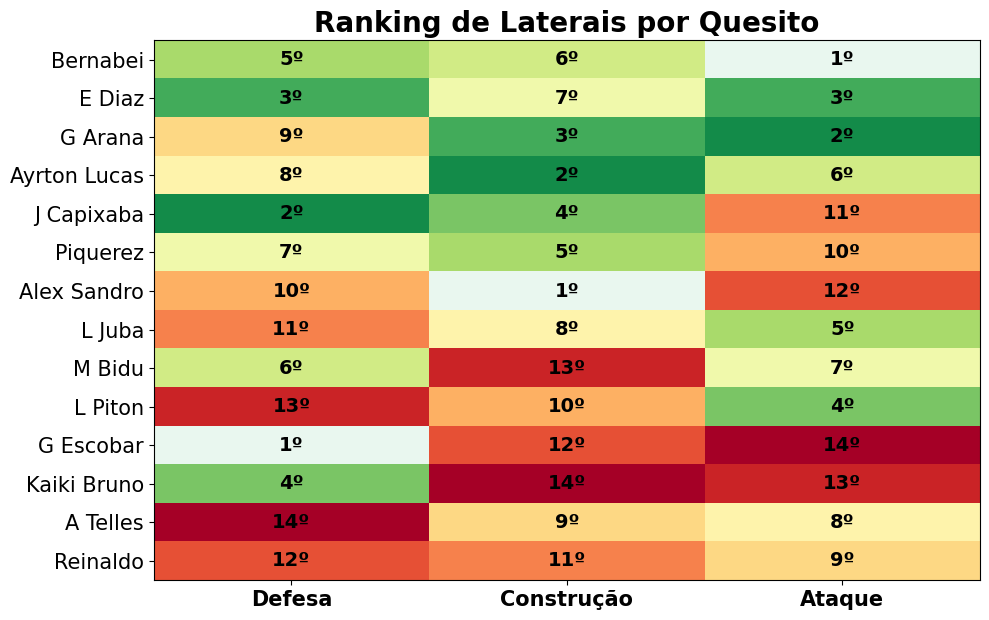

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

# --- ranking para laterais ---
# gera ranks (1 = melhor)
data['rank_def']   = data['def_score'].rank(ascending=False, method='min')
data['rank_build'] = data['build_score'].rank(ascending=False, method='min')
data['rank_att']   = data['att_score'].rank(ascending=False, method='min')

# ranking geral = soma simples (ou faça média se quiser menos sensível a extremos)
data['rank_overall'] = (data['rank_def'] + data['rank_build'] + data['rank_att']).rank(method='min')

# ordena pela posição no ranking geral
order = data.sort_values("rank_overall")["Jogador"].tolist()
idxd  = data.set_index("Jogador").reindex(order)

def percent_rank_from_rank(series):
    r = series.astype(float).values
    n = len(r)
    return np.ones_like(r) if n <= 1 else 1.0 - (r - 1.0) / (n - 1.0)

# matriz de valores normalizados (0–1) para heatmap
vals = np.c_[
    percent_rank_from_rank(idxd["rank_def"]),
    percent_rank_from_rank(idxd["rank_build"]),
    percent_rank_from_rank(idxd["rank_att"]),
]

# rótulos com posição ordinal (ex.: "3º")
labels = np.c_[
    idxd["rank_def"].astype(int).astype(str)   + "º",
    idxd["rank_build"].astype(int).astype(str) + "º",
    idxd["rank_att"].astype(int).astype(str)   + "º",
]

cols = ["Defesa", "Construção", "Ataque"]

# colormap igual (RdYlGn, melhor mais claro)
base = cm.get_cmap("RdYlGn", 256)
colors = base(np.linspace(0, 1, 256))
colors[-1, :] = np.array([233/255, 247/255, 239/255, 1.0])
custom_cmap = ListedColormap(colors)

# fontes
FS_TITLE = 20
FS_TICKS = 15
FS_CELLS = 14

# plot
fig, ax = plt.subplots(figsize=(10, max(6, 0.45*len(order))))
im = ax.imshow(vals, aspect="auto", cmap=custom_cmap, vmin=0, vmax=1)

# ticks e labels
ax.set_xticks(range(len(cols)))
ax.set_xticklabels(cols, fontsize=FS_TICKS, fontweight="bold")
ax.set_yticks(range(len(order)))
ax.set_yticklabels(order, fontsize=FS_TICKS)

# rótulos nas células
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        ax.text(j, i, labels[i, j], ha="center", va="center",
                fontsize=FS_CELLS, fontweight="bold")

ax.set_title("Ranking de Laterais por Quesito", fontsize=FS_TITLE, fontweight="bold")

plt.tight_layout()
plt.savefig("heatmap_laterais_2025.png", dpi=150)
plt.show()


In [18]:
# calcula minutes_weight (penaliza quem tem poucos minutos)
data['minutes_weight'] = np.minimum(1.0, np.sqrt(data['Minutes'] / 2700.0))

# aplica a penalização multiplicando direto nos sub-scores
data['def_score']   = data['def_score']   * data['minutes_weight']
data['build_score'] = data['build_score'] * data['minutes_weight']
data['att_score']   = data['att_score']   * data['minutes_weight']

/tmp/ipython-input-1922515221.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base = cm.get_cmap("RdYlGn", 256)


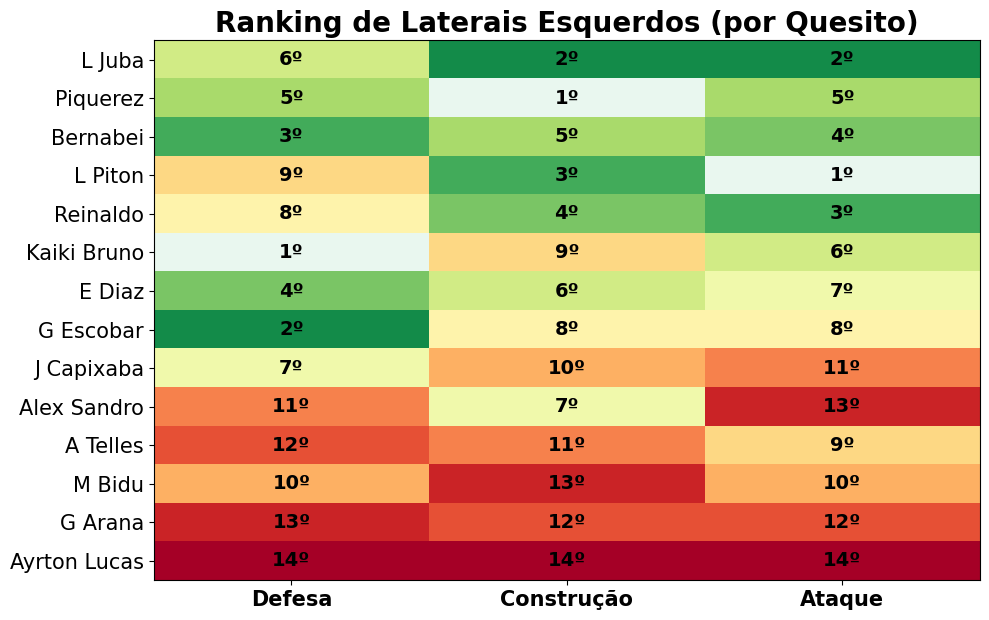

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

# --- ranking para laterais ---
# gera ranks (1 = melhor)
data['rank_def']   = data['def_score'].rank(ascending=False, method='min')
data['rank_build'] = data['build_score'].rank(ascending=False, method='min')
data['rank_att']   = data['att_score'].rank(ascending=False, method='min')

# ranking geral = soma simples (ou faça média se quiser menos sensível a extremos)
data['rank_overall'] = (data['rank_def'] + data['rank_build'] + data['rank_att']).rank(method='min')

# ordena pela posição no ranking geral
order = data.sort_values("rank_overall")["Jogador"].tolist()
idxd  = data.set_index("Jogador").reindex(order)

def percent_rank_from_rank(series):
    r = series.astype(float).values
    n = len(r)
    return np.ones_like(r) if n <= 1 else 1.0 - (r - 1.0) / (n - 1.0)

# matriz de valores normalizados (0–1) para heatmap
vals = np.c_[
    percent_rank_from_rank(idxd["rank_def"]),
    percent_rank_from_rank(idxd["rank_build"]),
    percent_rank_from_rank(idxd["rank_att"]),
]

# rótulos com posição ordinal (ex.: "3º")
labels = np.c_[
    idxd["rank_def"].astype(int).astype(str)   + "º",
    idxd["rank_build"].astype(int).astype(str) + "º",
    idxd["rank_att"].astype(int).astype(str)   + "º",
]

cols = ["Defesa", "Construção", "Ataque"]

# colormap igual (RdYlGn, melhor mais claro)
base = cm.get_cmap("RdYlGn", 256)
colors = base(np.linspace(0, 1, 256))
colors[-1, :] = np.array([233/255, 247/255, 239/255, 1.0])
custom_cmap = ListedColormap(colors)

# fontes
FS_TITLE = 20
FS_TICKS = 15
FS_CELLS = 14

# plot
fig, ax = plt.subplots(figsize=(10, max(6, 0.45*len(order))))
im = ax.imshow(vals, aspect="auto", cmap=custom_cmap, vmin=0, vmax=1)

# ticks e labels
ax.set_xticks(range(len(cols)))
ax.set_xticklabels(cols, fontsize=FS_TICKS, fontweight="bold")
ax.set_yticks(range(len(order)))
ax.set_yticklabels(order, fontsize=FS_TICKS)

# rótulos nas células
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        ax.text(j, i, labels[i, j], ha="center", va="center",
                fontsize=FS_CELLS, fontweight="bold")

ax.set_title("Ranking de Laterais Esquerdos (por Quesito)", fontsize=FS_TITLE, fontweight="bold")

plt.tight_layout()
plt.savefig("heatmap_laterais_2025.png", dpi=150)
plt.show()


In [22]:
data['overall_score'] = (data['def_score'] + data['build_score'] + data['att_score']) * data['minutes_weight']

In [23]:
# ranking geral (1 = melhor)
data['rank_overall'] = data['overall_score'].rank(ascending=False, method='min')

# ordena
ranking = data.sort_values('rank_overall')[['Jogador','Minutes','overall_score','rank_overall',
                                           'def_score','build_score','att_score']]

print(ranking)

         Jogador  Minutes  overall_score  rank_overall  def_score  \
2       Piquerez     1691       6.409099           1.0   1.978472   
5         L Juba     1704       6.100741           2.0   1.641812   
3    Kaiki Bruno     1776       5.963852           3.0   3.190071   
9        L Piton     1704       5.785185           4.0   1.377003   
4       Reinaldo     1721       5.587938           5.0   1.570143   
10      Bernabei     1368       5.134222           6.0   2.111689   
13     G Escobar     1452       4.589037           7.0   2.786667   
7         E Diaz     1285       4.251605           8.0   2.046626   
8     J Capixaba     1080       3.013333           9.0   1.623303   
6       A Telles     1157       2.528259          10.0   0.676434   
0    Alex Sandro      959       2.225827          11.0   0.735035   
11        M Bidu     1010       2.207037          12.0   1.182458   
12       G Arana      775       1.569136          13.0   0.589334   
1   Ayrton Lucas      527       0.

/tmp/ipython-input-2017892274.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base = cm.get_cmap("RdYlGn", 256)


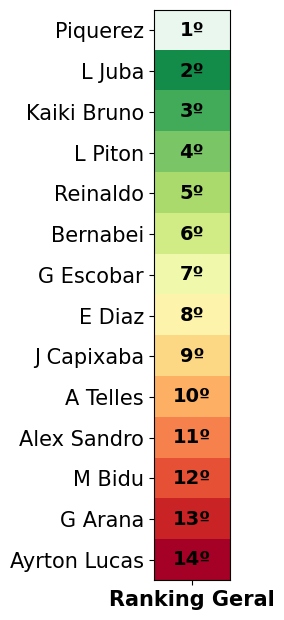

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

# ranking geral simples (sem pesos individuais)
data['rank_overall'] = data['overall_score'].rank(ascending=False, method='min')

# ordena pela posição no ranking geral
order = data.sort_values("rank_overall")["Jogador"].tolist()
idxd  = data.set_index("Jogador").reindex(order)

def percent_rank_from_rank(series):
    r = series.astype(float).values
    n = len(r)
    return np.ones_like(r) if n <= 1 else 1.0 - (r - 1.0) / (n - 1.0)

# valores normalizados para heatmap (só 1 coluna)
vals = np.c_[percent_rank_from_rank(idxd["rank_overall"])]

# rótulos com posição ordinal (ex.: "3º")
labels = np.c_[idxd["rank_overall"].astype(int).astype(str) + "º"]

cols = ["Ranking Geral"]

# colormap igual (RdYlGn)
base = cm.get_cmap("RdYlGn", 256)
colors = base(np.linspace(0, 1, 256))
colors[-1, :] = np.array([233/255, 247/255, 239/255, 1.0])
custom_cmap = ListedColormap(colors)

# fontes
FS_TITLE = 20
FS_TICKS = 15
FS_CELLS = 14

# plot
fig, ax = plt.subplots(figsize=(2.5, max(6, 0.45*len(order))))  # largura menor, só 1 coluna
im = ax.imshow(vals, aspect="auto", cmap=custom_cmap, vmin=0, vmax=1)

# ticks e labels
ax.set_xticks(range(len(cols)))
ax.set_xticklabels(cols, fontsize=FS_TICKS, fontweight="bold")
ax.set_yticks(range(len(order)))
ax.set_yticklabels(order, fontsize=FS_TICKS)

# rótulos nas células
for i in range(vals.shape[0]):
    ax.text(0, i, labels[i, 0], ha="center", va="center",
            fontsize=FS_CELLS, fontweight="bold")

#ax.set_title("Ranking Geral", fontsize=FS_TITLE, fontweight="bold")

plt.tight_layout()
plt.savefig("heatmap_laterais_overall_2025.png", dpi=150)
plt.show()